<a href="https://colab.research.google.com/github/tahmidtonmoy/KNN-Classifier-with-ResNet101-Google-Net-Efficient-Net-feature-extractor/blob/main/KNN_Classifier_with_ResNet101_Google_Net_Efficient_Net_feature_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.resnet import ResNet101
import tensorflow as tf




# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/
!unzip "/content/drive/MyDrive/train.zip"

**Image Processing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
batch_size = 32
image_size = (128, 128)
validation_split = 0.2

# Path to the main dataset folder
dataset_folder = "/content/drive/MyDrive/train"

# Create ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

# Load images from the dataset folder
train_generator = datagen.flow_from_directory(
    dataset_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'

)

validation_generator = datagen.flow_from_directory(
    dataset_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 7422 images belonging to 15 classes.
Found 1853 images belonging to 15 classes.


# Model

**Resnet**

**Feature Extractor**

In [ ]:
resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in resnet101.layers:
	layer.trainable = False

resnet101.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                   

**Training**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# import numpy as np

# # Assuming you have already defined and instantiated train_generator, validation_generator, test_generator

# def extract_features_and_labels(generator, model):
#     all_features = []
#     all_labels = []

#     for i in range(len(generator)):
#         batch_images, batch_labels = generator[i]
#         batch_features = model.predict(batch_images)
#         batch_features = batch_features.reshape(batch_features.shape[0], -1)
#         all_features.extend(batch_features)
#         all_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format

#     return np.array(all_features), np.array(all_labels)

# # Extract features using ResNet101
# train_features, train_labels = extract_features_and_labels(train_generator, resnet101)
# validation_features, validation_labels = extract_features_and_labels(validation_generator, resnet101)

# # Fit K-Nearest Neighbors classifier
# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(train_features, train_labels)

# # Predict on the validation set
# predictions = knn.predict(validation_features)

# # Calculate metrics
# accuracy = metrics.accuracy_score(validation_labels, predictions)
# precision = metrics.precision_score(validation_labels, predictions, average='weighted')
# recall = metrics.recall_score(validation_labels, predictions, average='weighted')

# print("Validation Accuracy =", accuracy)
# print("Precision =", precision)
# print("Recall =", recall)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np


# Assuming you have already defined and instantiated train_generator, validation_generator, test_generator


# Extract features using ResNet101
train_features = []
train_labels = []
for i in range(len(train_generator)):
    batch_images, batch_labels = train_generator[i]
    batch_features = resnet101.predict(batch_images)
    batch_features = batch_features.reshape(batch_features.shape[0], -1)
    train_features.extend(batch_features)
    train_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format


train_features = np.array(train_features)
train_labels = np.array(train_labels)


# Fit K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_features, train_labels)


# Extract features for validation set
validation_features = []
validation_labels = []
for i in range(len(validation_generator)):
    batch_images, batch_labels = validation_generator[i]
    batch_features = resnet101.predict(batch_images)
    batch_features = batch_features.reshape(batch_features.shape[0], -1)
    validation_features.extend(batch_features)
    validation_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format


validation_features = np.array(validation_features)
validation_labels = np.array(validation_labels)


1/1 [==============================] - 0s 30ms/step


In [ ]:
# Now predict using the trained KNN model
prediction_knn = knn.predict(validation_features)

# Calculate accuracy
accuracy = metrics.accuracy_score(validation_labels, prediction_knn)
print("Validation Accuracy =", accuracy)

# Calculate precision
precision = metrics.precision_score(validation_labels, prediction_knn, average='weighted')
print("Precision =", precision)

# Calculate recall
recall = metrics.recall_score(validation_labels, prediction_knn, average='weighted')
print("Recall =", recall)


Validation Accuracy = 0.7015025041736227
Precision = 0.5305121787981653
Recall = 0.7015025041736227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

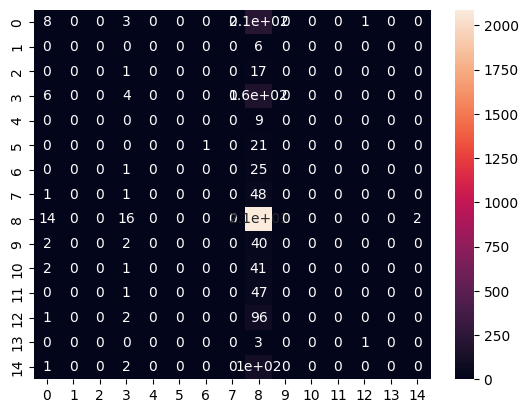

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(validation_labels, prediction_knn)
sns.heatmap(cm, annot=True)

**Google_Net**

In [ ]:
from keras.applications import InceptionV3


# Instantiate InceptionNetV1 with pre-trained weights
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


# Freeze all layers
for layer in inceptionv3.layers:
    layer.trainable = False


# Display model summary
inceptionv3.summary()


87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np


# Assuming you have already defined and instantiated train_generator, validation_generator, test_generator


# Extract features using ResNet101
train_features = []
train_labels = []
for i in range(len(train_generator)):
    batch_images, batch_labels = train_generator[i]
    batch_features = inceptionv3.predict(batch_images)
    batch_features = batch_features.reshape(batch_features.shape[0], -1)
    train_features.extend(batch_features)
    train_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format


train_features = np.array(train_features)
train_labels = np.array(train_labels)


# Fit K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_features, train_labels)


# Extract features for validation set
validation_features = []
validation_labels = []
for i in range(len(validation_generator)):
    batch_images, batch_labels = validation_generator[i]
    batch_features = inceptionv3.predict(batch_images)
    batch_features = batch_features.reshape(batch_features.shape[0], -1)
    validation_features.extend(batch_features)
    validation_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format


validation_features = np.array(validation_features)
validation_labels = np.array(validation_labels)


1/1 [==============================] - 2s 2s/step


In [ ]:
# Now predict using the trained KNN model
prediction_knn = knn.predict(validation_features)


# Calculate accuracy
accuracy = metrics.accuracy_score(validation_labels, prediction_knn)
print("Validation Accuracy =", accuracy)

# Calculate precision
precision = metrics.precision_score(validation_labels, prediction_knn, average='weighted')
print("Precision =", precision)

# Calculate recall
recall = metrics.recall_score(validation_labels, prediction_knn, average='weighted')
print("Recall =", recall)


Validation Accuracy = 0.7085141903171953
Precision = 0.55308838109553
Recall = 0.7085141903171953


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

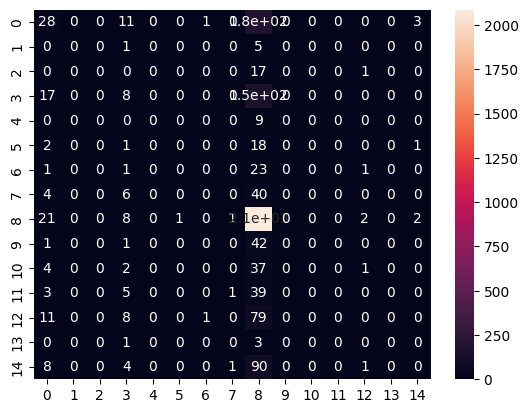

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(validation_labels, prediction_knn)
sns.heatmap(cm, annot=True)



**Efficient Net**

In [ ]:
from keras.applications import EfficientNetB2


# Instantiate InceptionNetV1 with pre-trained weights
EfficientNet = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


# Freeze all layers
for layer in EfficientNet.layers:
    layer.trainable = False


# Display model summary
EfficientNet.summary()

31790344/31790344 [==============================] - 0s 0us/step
Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 128, 128, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 128, 128, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescal

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np


# Assuming you have already defined and instantiated train_generator, validation_generator, test_generator


# Extract features using ResNet101
train_features = []
train_labels = []
for i in range(len(train_generator)):
    batch_images, batch_labels = train_generator[i]
    batch_features = EfficientNet.predict(batch_images)
    batch_features = batch_features.reshape(batch_features.shape[0], -1)
    train_features.extend(batch_features)
    train_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format


train_features = np.array(train_features)
train_labels = np.array(train_labels)


# Fit K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_features, train_labels)


# Extract features for validation set
validation_features = []
validation_labels = []
for i in range(len(validation_generator)):
    batch_images, batch_labels = validation_generator[i]
    batch_features = EfficientNet.predict(batch_images)
    batch_features = batch_features.reshape(batch_features.shape[0], -1)
    validation_features.extend(batch_features)
    validation_labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to single-label format


validation_features = np.array(validation_features)
validation_labels = np.array(validation_labels)



1/1 [==============================] - 1s 1s/step


In [ ]:
# Now predict using the trained KNN model
prediction_knn = knn.predict(validation_features)


# Calculate accuracy
accuracy = metrics.accuracy_score(validation_labels, prediction_knn)
print("Validation Accuracy =", accuracy)

# Calculate precision
precision = metrics.precision_score(validation_labels, prediction_knn, average='weighted')
print("Precision =", precision)

# Calculate recall
recall = metrics.recall_score(validation_labels, prediction_knn, average='weighted')
print("Recall =", recall)


Validation Accuracy = 0.7015025041736227
Precision = 0.5399188204915484
Recall = 0.7015025041736227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

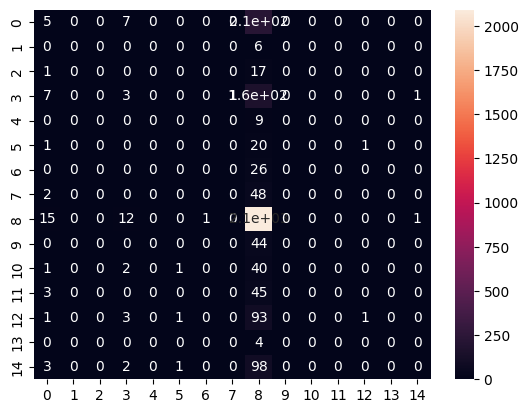

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(validation_labels, prediction_knn)
sns.heatmap(cm, annot=True)